In [1]:
import requests
import datetime
import time
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from api.GlassnodeAPI import GlassnodeAPI
from api.CoinGeckoAPI import CoinGeckoAPI

In [3]:
glassnode_api_key = open("/home/malimi/Skillset/glassnode_api_key.txt",'r').read()[:-1]

In [4]:
g = GlassnodeAPI(key=glassnode_api_key, time_out=10)

In [5]:
a = g.get_market_cap_realized_cap()
a

,time,market cap,realized cap
0,2010-07-17 02:00:00,1.702649e+05,1.702649e+05
1,2010-07-18 02:00:00,2.225672e+05,1.711265e+05
2,2010-07-19 02:00:00,3.138020e+05,1.729175e+05
3,2010-07-20 02:00:00,2.757412e+05,1.738318e+05
4,2010-07-21 02:00:00,2.444626e+05,1.746896e+05
...,...,...,...
3852,2021-02-01 01:00:00,6.270828e+11,2.223787e+11
3853,2021-02-02 01:00:00,6.457204e+11,2.234016e+11
3854,2021-02-03 01:00:00,6.796571e+11,2.244023e+11
3855,2021-02-04 01:00:00,6.972387e+11,2.259190e+11


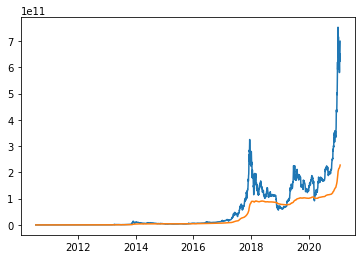

In [6]:
plt.plot(a['time'],a['market cap'])
plt.plot(a['time'],a['realized cap'])

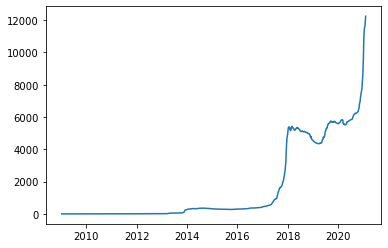

In [6]:
aux = g.get_realized_price()
plt.plot(aux['time'],aux['realized price'])

In [25]:
a = g.get_realized_price()
b = g.get_closing_price()


In [26]:
a = a.merge(b, on='time')
a

,time,realized price,price
0,2010-07-17 02:00:00,0.049510,0.049510
1,2010-07-18 02:00:00,0.049636,0.085840
2,2010-07-19 02:00:00,0.050030,0.080800
3,2010-07-20 02:00:00,0.050163,0.074733
4,2010-07-21 02:00:00,0.050260,0.079210
...,...,...,...
3852,2021-02-01 01:00:00,11945.138601,33543.859744
3853,2021-02-02 01:00:00,11999.467109,35524.119952
3854,2021-02-03 01:00:00,12052.611823,37451.367473
3855,2021-02-04 01:00:00,12133.419869,36924.742006


In [15]:
res = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr',
    params={'a': 'BTC', 'api_key': g.key})
df = pd.read_json(res.text, convert_dates=['t'])

In [9]:
df.iloc[0]

t    2010-07-17 00:00:00
v                    1.0
Name: 0, dtype: object

In [8]:
datetime.datetime.fromtimestamp(1612396800)

datetime.datetime(2021, 2, 4, 1, 0)

In [12]:
# make API request
res = requests.get('https://api.glassnode.com/v1/metrics/indicators/sopr',
    params={'a': 'BTC', 'api_key': g.key})

# convert to pandas dataframe
df = pd.read_json(res.text, convert_dates=['t'])
df

,t,v
0,1279324800,1.000000
1,1279411200,1.174760
2,1279497600,1.318536
3,1279584000,1.090517
4,1279670400,1.065532
...,...,...
4217,1643673600,1.016613
4218,1643760000,0.997679
4219,1643846400,0.997416
4220,1643932800,1.003405


In [20]:
df = pd.read_json(requests.get('https://api.glassnode.com/v1/metrics/market/price_realized_usd',
    params={'a': 'btc', 'api_key': g.key}).text)
df

,t,v
0,1230940800,0.049510
1,1231027200,NaN
2,1231113600,NaN
3,1231200000,NaN
4,1231286400,NaN
...,...,...
4412,1612137600,11945.138601
4413,1612224000,11999.467109
4414,1612310400,12052.611823
4415,1612396800,12133.419869


In [11]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)


In [11]:
df = pd.DataFrame(columns=['date','price'])
df

,date,price


In [14]:
df.loc[len(df)-1] = [1,2]
df

,date,price
0,1,2


In [3]:
date_time_from = datetime.datetime(year=2013, month=5,day=1)
date_time_to = datetime.datetime(year=2022, month = 2, day = 7)

In [4]:
y = CoinGeckoAPI().get_closing_prices(date_time_from,date_time_to,'day')

In [5]:
y

,date,price
0,2013-05-01 02:00:00,117.000000
1,2013-05-02 02:00:00,103.430000
2,2013-05-03 02:00:00,91.010000
3,2013-05-04 02:00:00,111.250000
4,2013-05-05 02:00:00,116.790000
...,...,...
3195,2022-02-02 01:00:00,38835.694943
3196,2022-02-03 01:00:00,37000.982499
3197,2022-02-04 01:00:00,37101.351594
3198,2022-02-05 01:00:00,41673.839554


In [6]:
import matplotlib.pyplot as plt
import numpy as np

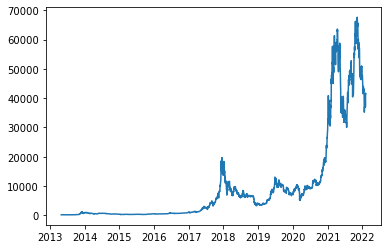

In [7]:
plt.plot(y['date'],y['price']);